         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23     

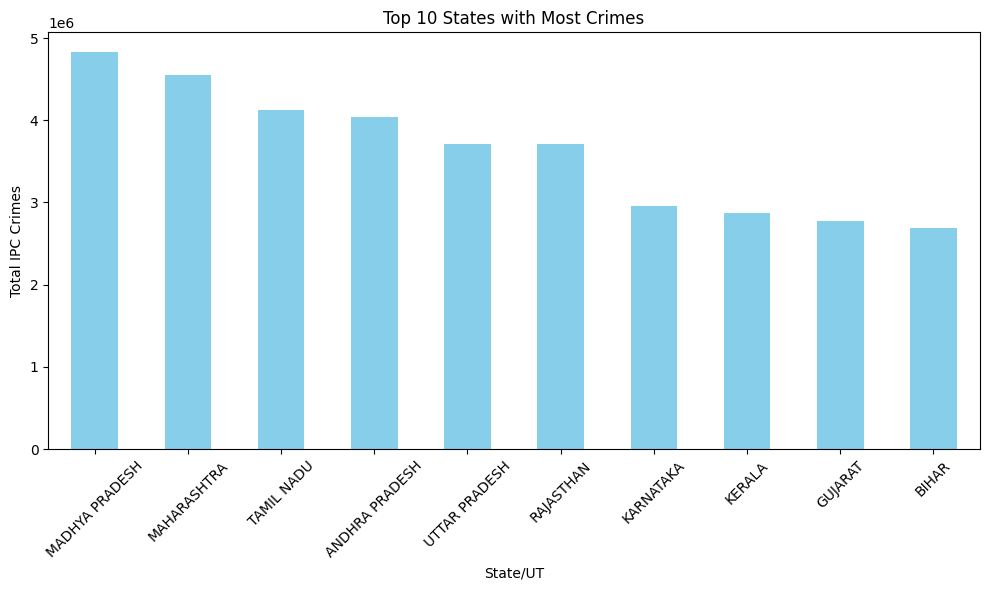

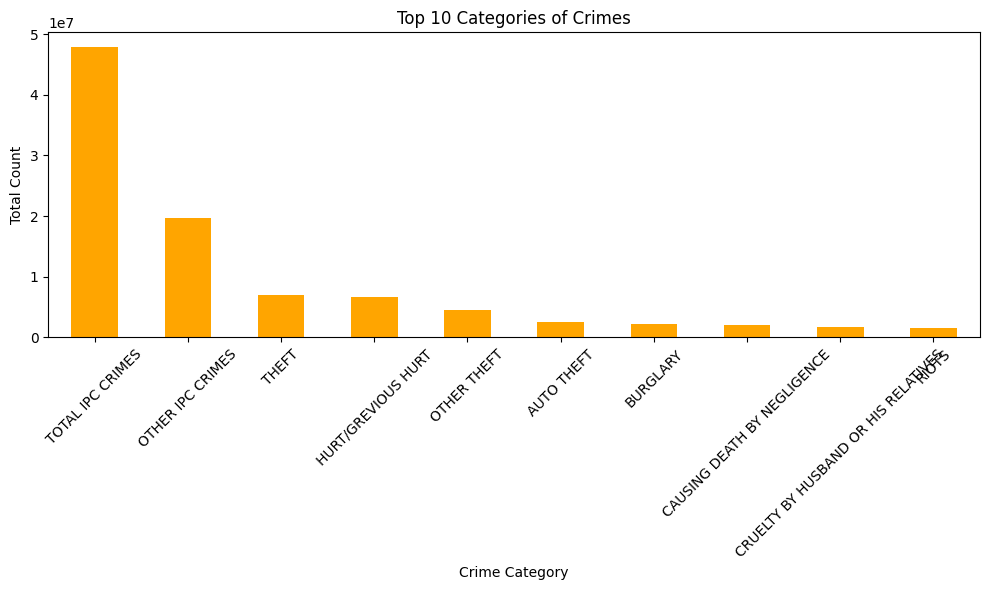

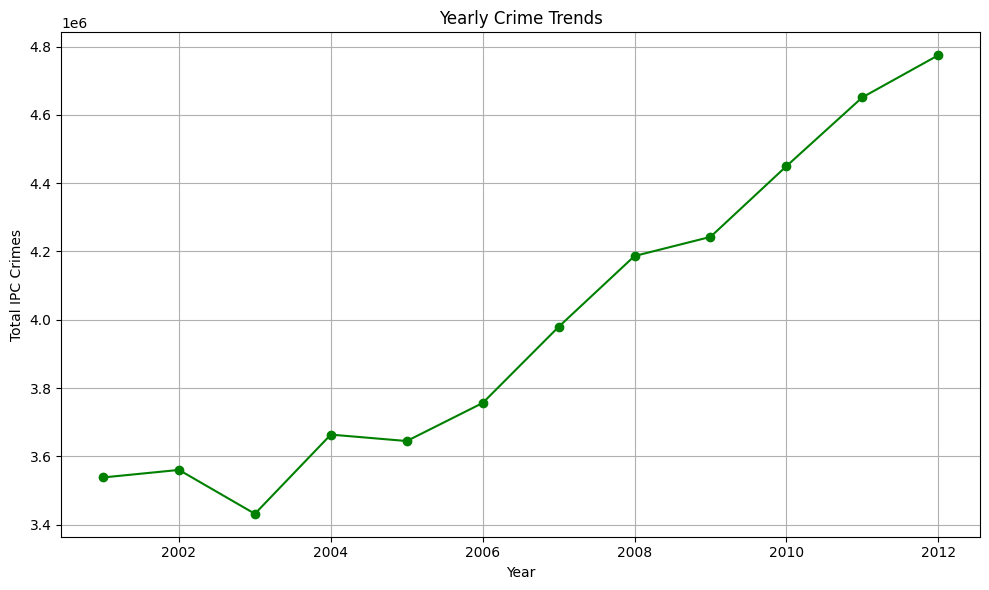

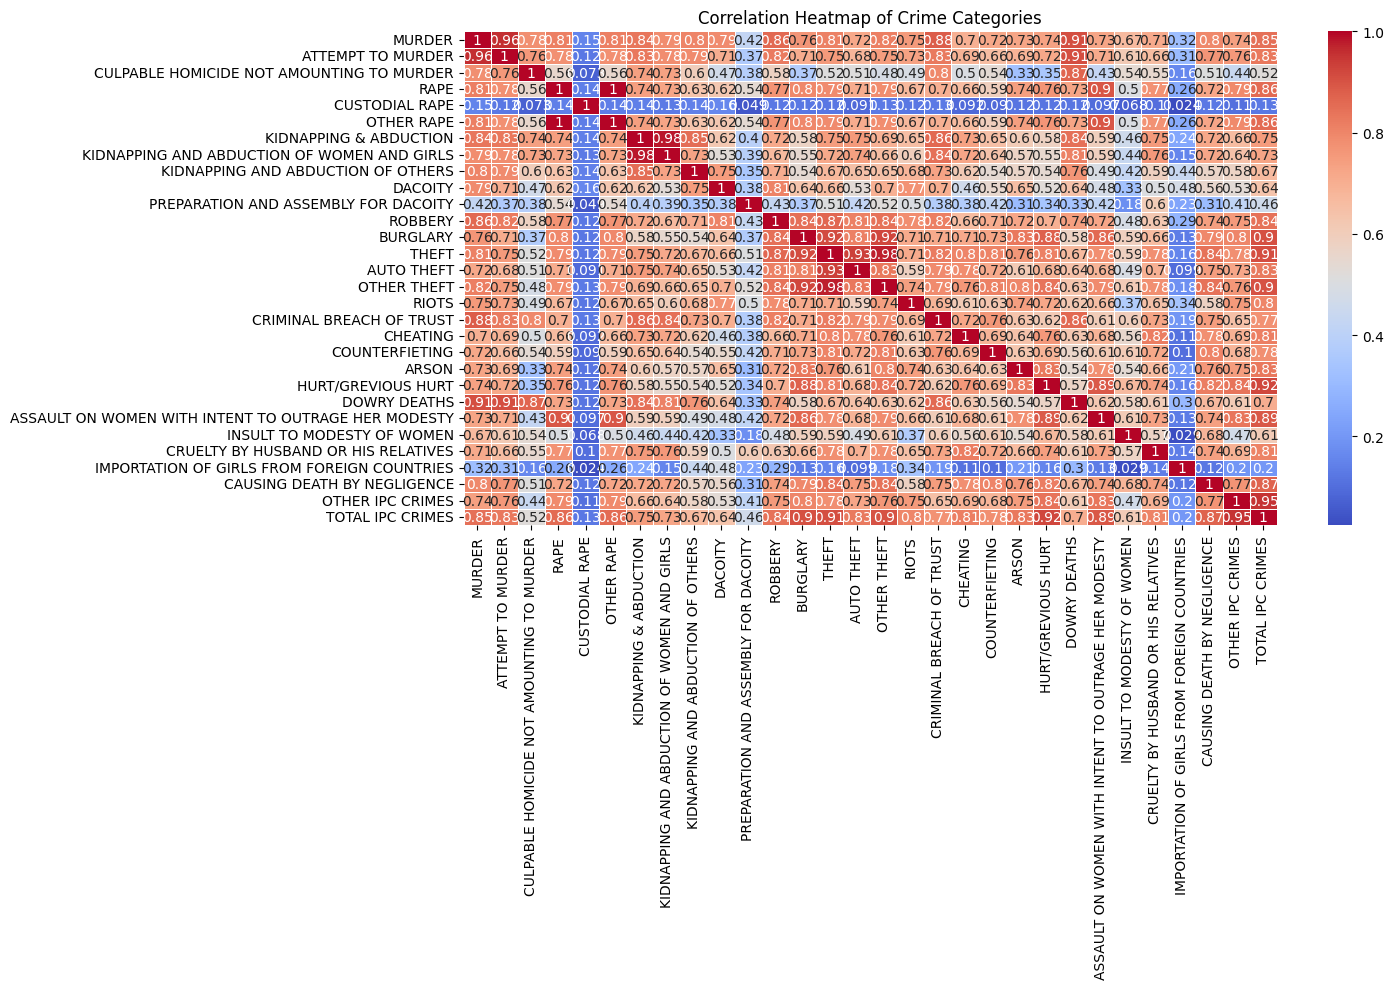

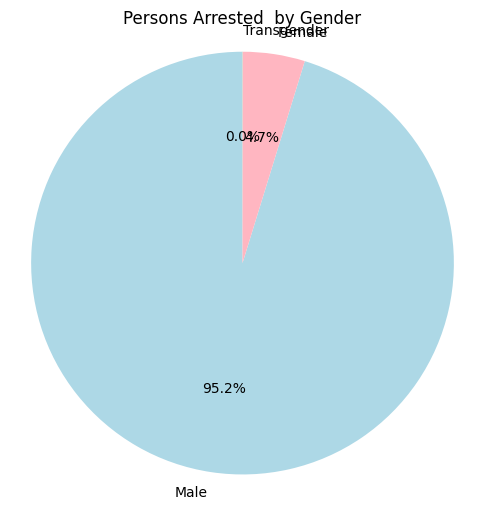

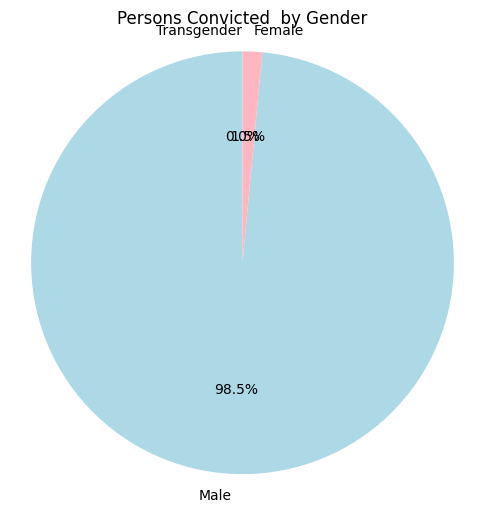

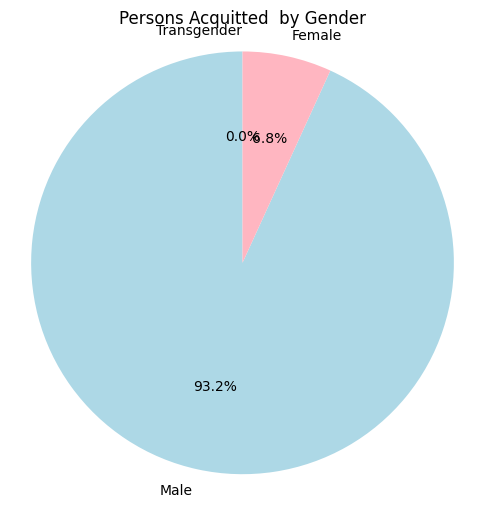

<Figure size 1200x800 with 0 Axes>

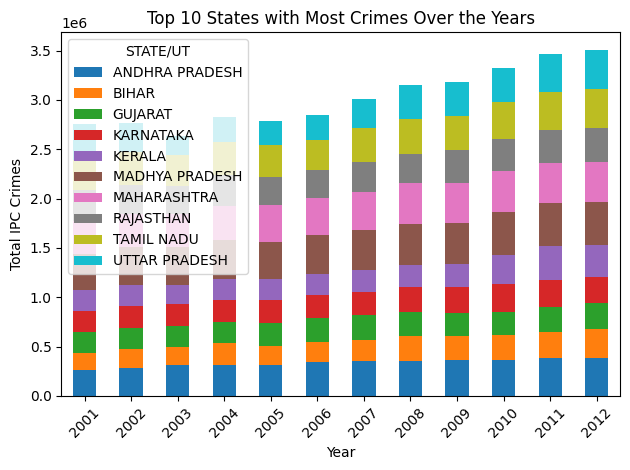

Crime Disposal Data Overview:
       Persons Arrested - Male  Persons Arrested - Female  \
count                      142                        142   
mean                     11691                        583   
std                      45829                       2346   
min                          0                          0   
25%                         64                          1   
50%                        809                         26   
75%                       4821                        170   
max                     491724                      24152   

       Persons Arrested - Transgender  Persons Arrested - Total  \
count                             142                       142   
mean                                1                     12275   
std                                 5                     48009   
min                                 0                         0   
25%                                 0                        73   
50%               

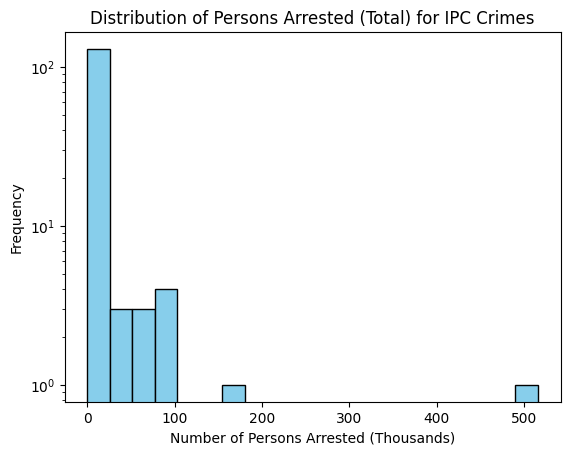

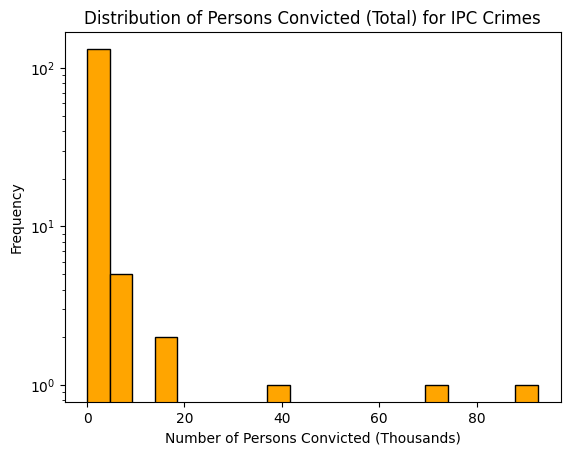

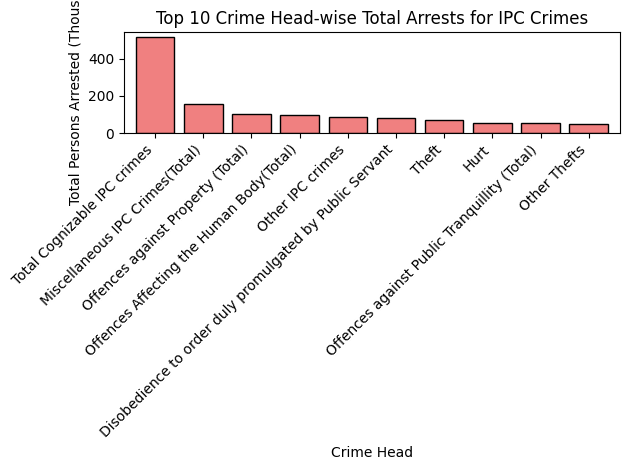

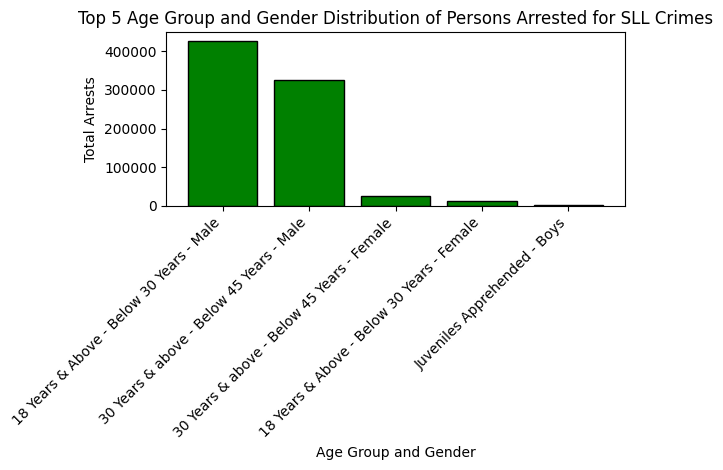

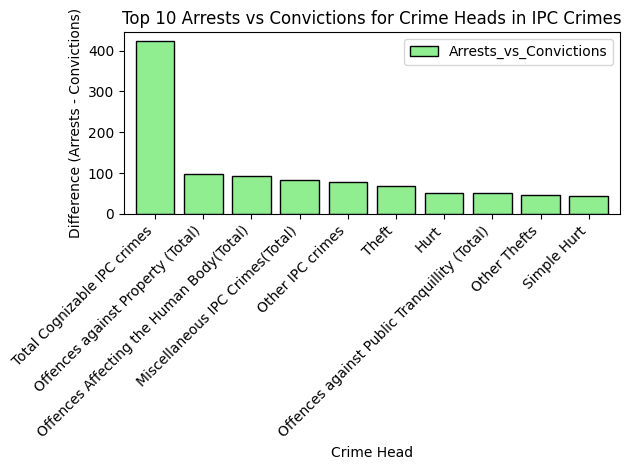

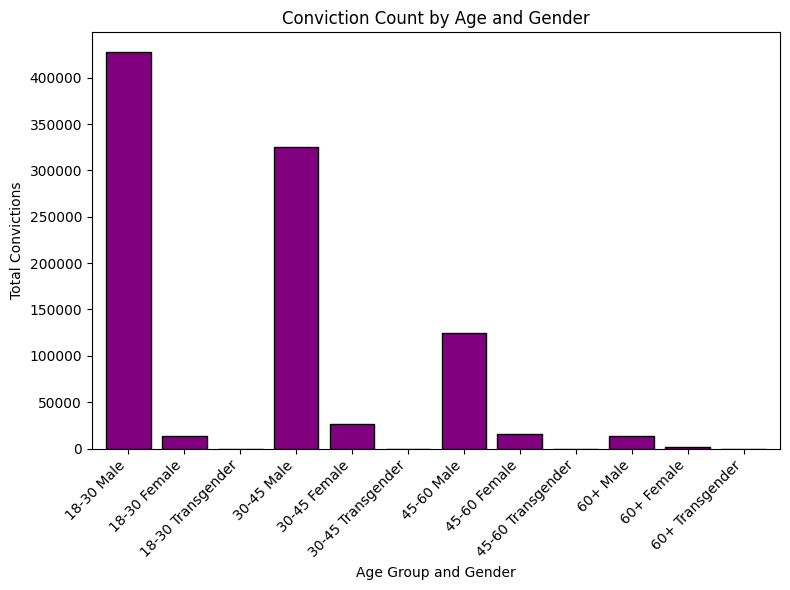

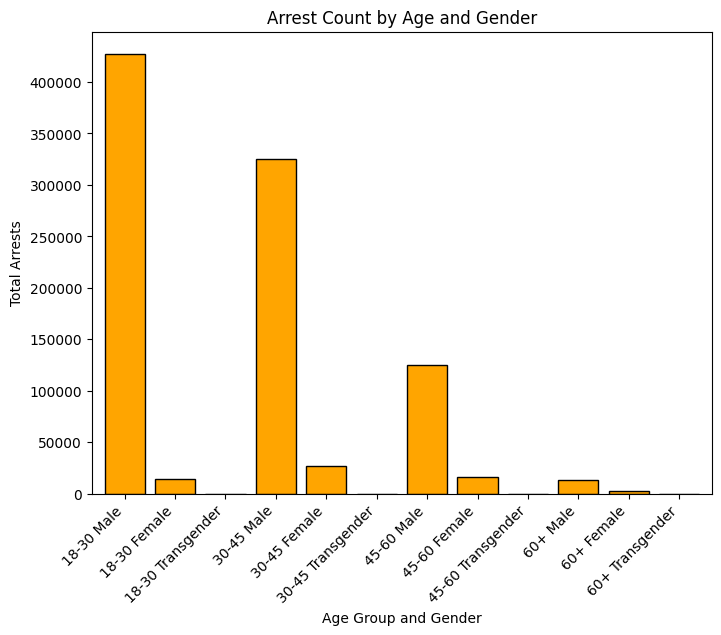

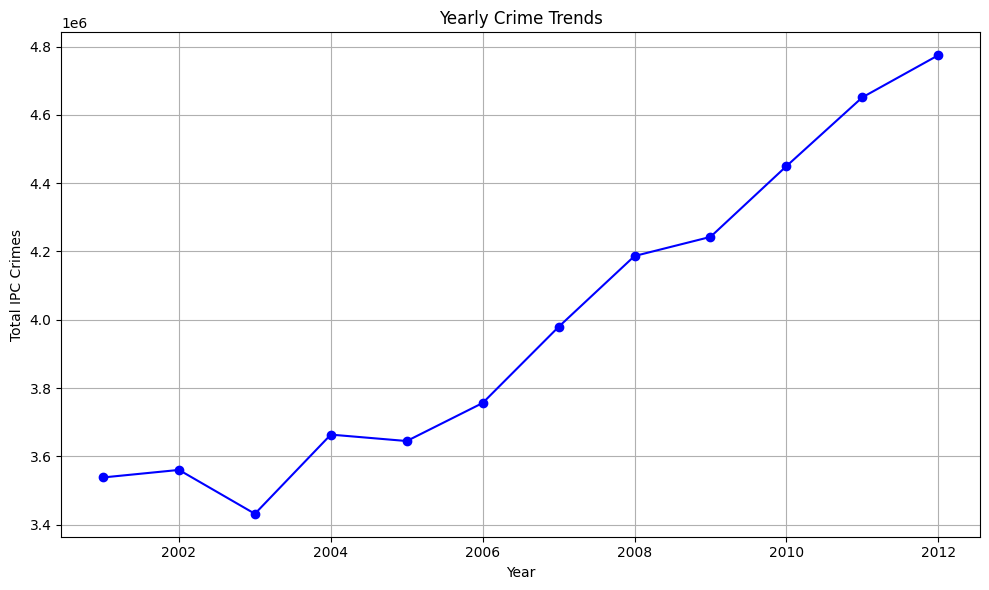

ADF Statistic: -0.8598072670528493
p-value: 0.8009202508419861
Critical Values: {'1%': np.float64(-4.9386902332361515), '5%': np.float64(-3.477582857142857), '10%': np.float64(-2.8438679591836733)}
The time series is not stationary
ADF Statistic: -4.200923786210227
p-value: 0.0006565317599239775
Critical Values: {'1%': np.float64(-4.9386902332361515), '5%': np.float64(-3.477582857142857), '10%': np.float64(-2.8438679591836733)}
The time series is stationary
                               SARIMAX Results                                
Dep. Variable:       TOTAL IPC CRIMES   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -105.940
Date:                Mon, 20 Jan 2025   AIC                            217.879
Time:                        21:06:56   BIC                            218.117
Sample:                             0   HQIC                           216.272
                                  - 9                           

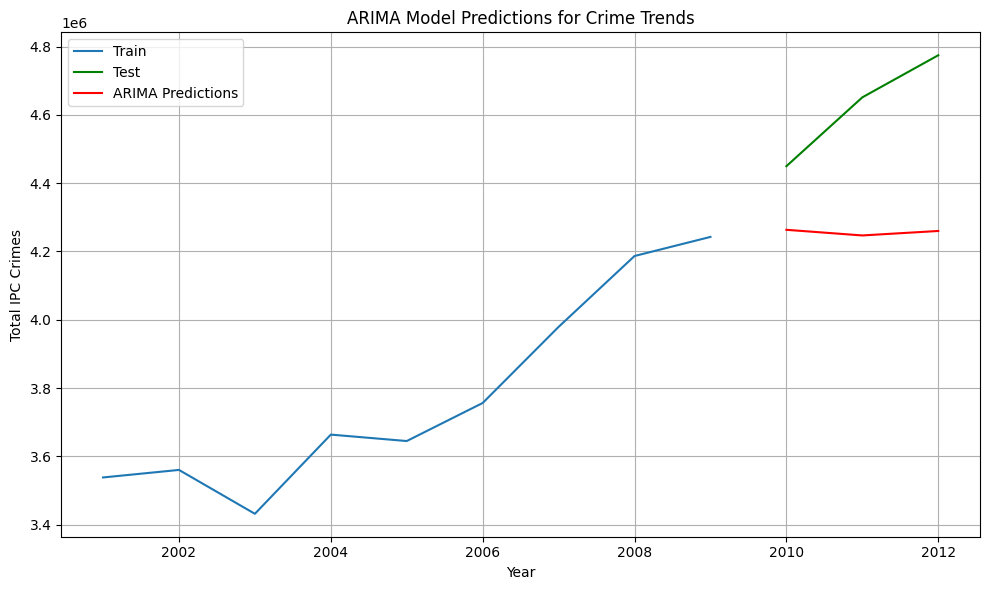

Mean Squared Error: 154186381437.6116


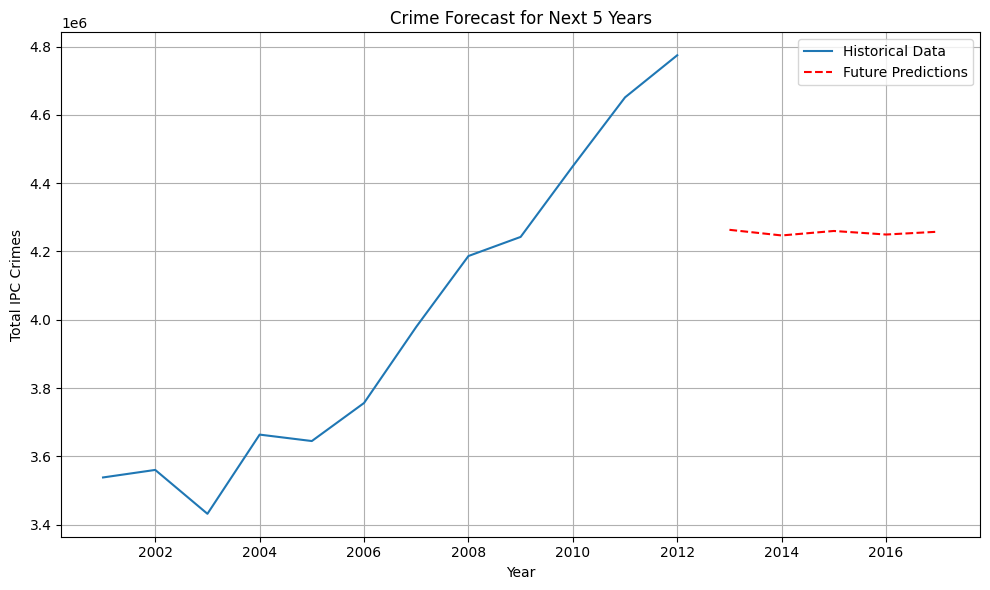

Future predictions for the next 5 years:
0   4263455
1   4246966
2   4260060
3   4249662
4   4257919
Name: predicted_mean, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# 1. Load the datasets
df = pd.read_csv('csv3.csv')
crime_disposal_df = pd.read_csv('csv1.csv', encoding='ISO-8859-1')
crime_age_gender_df = pd.read_csv('csv2.csv', encoding='ISO-8859-1')

# Preview the data to understand its structure
print(df.head())
print(crime_disposal_df.head())
print(crime_age_gender_df.head())

# 2. Data Cleaning
# Drop rows with missing values for key columns
crime_disposal_df = crime_disposal_df.dropna(subset=['Crime Head'])
crime_age_gender_df = crime_age_gender_df.dropna(subset=['Crime Head'])

# Strip leading/trailing spaces from column names
crime_disposal_df.columns = crime_disposal_df.columns.str.strip()
crime_age_gender_df.columns = crime_age_gender_df.columns.str.strip()

# Check for missing values in the main dataset
print("Missing values in the main dataset:")
print(df.isnull().sum())

# 3. Convert 'YEAR' column to integers for better handling
df['YEAR'] = df['YEAR'].astype(int)

# 4. Aggregate crime data by state and year
state_crime_totals = df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False).head(10)
category_totals = df.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR']).sum().sort_values(ascending=False).head(10)

# 5. Visualization: Top 10 States with the Most Crimes
plt.figure(figsize=(10, 6))
state_crime_totals.plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Most Crimes')
plt.xlabel('State/UT')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Visualization: Top 10 Crime Categories
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar', color='orange')
plt.title('Top 10 Categories of Crimes')
plt.xlabel('Crime Category')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Visualization: Yearly Crime Trends
yearly_trends = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='green')
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Correlation Heatmap of Crime Categories
crime_columns = df.drop(columns=['STATE/UT', 'DISTRICT', 'YEAR']).columns
correlation_matrix = df[crime_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Crime Categories')
plt.tight_layout()
plt.show()

# 9. Gender-wise Analysis: Arrested, Convicted, Acquitted
genders = ['Male', 'Female', 'Transgender']
for status in ['Persons Arrested - ', 'Persons Convicted - ', 'Persons Acquitted - ']:
    gender_data = [
        crime_disposal_df[status + 'Male'].sum(),
        crime_disposal_df[status + 'Female'].sum(),
        crime_disposal_df[status + 'Transgender'].sum()
    ]
    plt.figure(figsize=(6, 6))
    plt.pie(gender_data, labels=genders, autopct='%1.1f%%', colors=['lightblue', 'lightpink', 'lightgreen'], startangle=90)
    plt.title(f'{status[:-2]} by Gender')
    plt.axis('equal')
    plt.show()

    # Top 10 States with Crimes Over the Years
top_states_yearly = df[df['STATE/UT'].isin(state_crime_totals.index)].groupby(['YEAR', 'STATE/UT'])['TOTAL IPC CRIMES'].sum().unstack()
plt.figure(figsize=(12, 8))
top_states_yearly.plot(kind='bar', stacked=True)
plt.title('Top 10 States with Most Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary: Overview of Crime Disposal and Age & Gender Data
print("Crime Disposal Data Overview:")
print(crime_disposal_df.describe())
print("\nCrime Age & Gender Data Overview:")
print(crime_age_gender_df.describe())

# Distribution of Persons Arrested and Convicted (Total)
crime_disposal_df['Persons Arrested - Total'] = crime_disposal_df['Persons Arrested - Total'] / 1000
crime_disposal_df['Persons Arrested - Total'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', log=True)
plt.title('Distribution of Persons Arrested (Total) for IPC Crimes')
plt.xlabel('Number of Persons Arrested (Thousands)')
plt.ylabel('Frequency')
plt.show()

crime_disposal_df['Persons Convicted - Total'] = crime_disposal_df['Persons Convicted - Total'] / 1000
crime_disposal_df['Persons Convicted - Total'].plot(kind='hist', bins=20, color='orange', edgecolor='black', log=True)
plt.title('Distribution of Persons Convicted (Total) for IPC Crimes')
plt.xlabel('Number of Persons Convicted (Thousands)')
plt.ylabel('Frequency')
plt.show()

# Crime Head-wise Arrests (Top 10)
top_crimes = crime_disposal_df.groupby('Crime Head')['Persons Arrested - Total'].sum().sort_values(ascending=False).head(10)
top_crimes.plot(kind='bar', color='lightcoral', edgecolor='black', width=0.8)
plt.title('Top 10 Crime Head-wise Total Arrests for IPC Crimes')
plt.xlabel('Crime Head')
plt.ylabel('Total Persons Arrested (Thousands)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gender-wise Arrests in Age Groups
age_gender_columns = ['Juveniles Apprehended - Boys', 'Juveniles Apprehended - Girls', 'Juveniles Apprehended - Transgender',
                      '18 Years & Above - Below 30 Years - Male', '18 Years & Above - Below 30 Years - Female', '18 Years & Above - Below 30 Years - Transgender',
                      '30 Years & above - Below 45 Years - Male', '30 Years & above - Below 45 Years - Female', '30 Years & above - Below 45 Years - Transgender']
age_gender_df = crime_age_gender_df[age_gender_columns].sum()
top_age_gender = age_gender_df.sort_values(ascending=False).head(5)
top_age_gender.plot(kind='bar', color='green', edgecolor='black', width=0.8)
plt.title('Top 5 Age Group and Gender Distribution of Persons Arrested for SLL Crimes')
plt.xlabel('Age Group and Gender')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Arrests vs Convictions for IPC Crime Heads
crime_disposal_df['Arrests_vs_Convictions'] = crime_disposal_df['Persons Arrested - Total'] - crime_disposal_df['Persons Convicted - Total']
top_arrests_vs_convictions = crime_disposal_df[['Crime Head', 'Arrests_vs_Convictions']].set_index('Crime Head').sort_values(by='Arrests_vs_Convictions', ascending=False).head(10)
top_arrests_vs_convictions.plot(kind='bar', color='lightgreen', edgecolor='black', width=0.8)
plt.title('Top 10 Arrests vs Convictions for Crime Heads in IPC Crimes')
plt.xlabel('Crime Head')
plt.ylabel('Difference (Arrests - Convictions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gender-wise Convictions by Age Group
age_gender_conviction_df = crime_age_gender_df[['18 Years & Above - Below 30 Years - Male', '18 Years & Above - Below 30 Years - Female', '18 Years & Above - Below 30 Years - Transgender',
                                                '30 Years & above - Below 45 Years - Male', '30 Years & above - Below 45 Years - Female', '30 Years & above - Below 45 Years - Transgender',
                                                '45 Years & above - Below 60 Years - Male', '45 Years & above - Below 60 Years - Female', '45 Years & above - Below 60 Years - Transgender',
                                                '60 Years & Above - Male', '60 Years & Above - Female', '60 Years & Above - Transgender']].sum()
age_labels = ['18-30 Male', '18-30 Female', '18-30 Transgender', '30-45 Male', '30-45 Female', '30-45 Transgender', '45-60 Male', '45-60 Female', '45-60 Transgender', '60+ Male', '60+ Female', '60+ Transgender']
plt.figure(figsize=(8, 6))
age_gender_conviction_df.plot(kind='bar', color='purple', edgecolor='black', width=0.8)
plt.title('Conviction Count by Age and Gender')
plt.xlabel('Age Group and Gender')
plt.ylabel('Total Convictions')
plt.xticks(ticks=range(len(age_labels)), labels=age_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gender-wise Arrests by Age Group
age_gender_arrests_df = crime_age_gender_df[['18 Years & Above - Below 30 Years - Male', '18 Years & Above - Below 30 Years - Female', '18 Years & Above - Below 30 Years - Transgender',
                                             '30 Years & above - Below 45 Years - Male', '30 Years & above - Below 45 Years - Female', '30 Years & above - Below 45 Years - Transgender',
                                             '45 Years & above - Below 60 Years - Male', '45 Years & above - Below 60 Years - Female', '45 Years & above - Below 60 Years - Transgender',
                                             '60 Years & Above - Male', '60 Years & Above - Female', '60 Years & Above - Transgender']].sum()
plt.figure(figsize=(8, 6))
age_gender_arrests_df.plot(kind='bar', color='orange', edgecolor='black', width=0.8)
plt.title('Arrest Count by Age and Gender')
plt.xlabel('Age Group and Gender')
plt.ylabel('Total Arrests')
plt.xticks(ticks=range(len(age_labels)), labels=age_labels, rotation=45, ha='right')


# 10. ARIMA Time Series Analysis for Crime Trends
# Aggregate the total crimes by year (this will serve as our time series data)
yearly_crimes = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum()

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(yearly_crimes.index, yearly_crimes.values, marker='o', linestyle='-', color='blue')
plt.title('Yearly Crime Trends')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Stationarity Check using Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

adf_test(yearly_crimes)

# 12. If time series is not stationary, difference the data
diff_yearly_crimes = yearly_crimes.diff().dropna()

# Re-check stationarity after differencing
adf_test(diff_yearly_crimes)

# 13. Split the data into training and test sets
train_size = int(len(yearly_crimes) * 0.8)
train, test = yearly_crimes[:train_size], yearly_crimes[train_size:]

# 14. Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q) values can be adjusted based on your dataset's behavior
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# 15. Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))
test.index = test.index

# 16. Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions for Crime Trends')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 17. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# 18. Forecast future crime trends for the next 5 years
future_years = np.arange(yearly_crimes.index.max() + 1, yearly_crimes.index.max() + 6)
future_predictions = model_fit.forecast(steps=5)

plt.figure(figsize=(10, 6))
plt.plot(yearly_crimes.index, yearly_crimes.values, label='Historical Data')
plt.plot(future_years, future_predictions, label='Future Predictions', color='red', linestyle='--')
plt.title('Crime Forecast for Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 19. Display predictions in a standard floating-point format (no exponential notation)
pd.options.display.float_format = '{:.0f}'.format

# Reset the index of the future predictions series (optional, but keeps only the values)
print("Future predictions for the next 5 years:")
print(future_predictions.reset_index(drop=True))

